<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


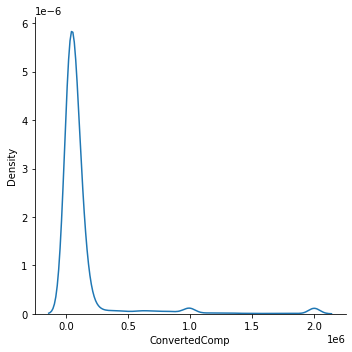

In [6]:
# your code goes here
import seaborn as sns

sns.displot(df['ConvertedComp'], kind = "kde")

Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

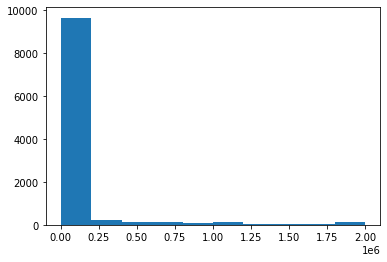

In [13]:
# your code goes here
import matplotlib.pyplot as plt

plt.hist(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [112]:
# your code goes here
df['ConvertedComp'].median()

65537.5

How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here

df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

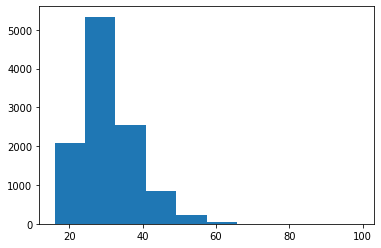

In [33]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

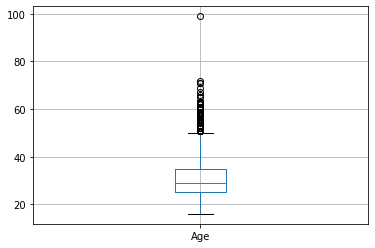

In [52]:
# your code goes here
df.boxplot(column='Age')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [83]:
# your code goes here
import numpy as np

df_cv = df['ConvertedComp'].dropna()
q75, q25 = np.percentile(df_cv, [75, 25])
iqr = q75 - q25
iqr

70842.5

Find out the upper and lower bounds.


In [86]:
# your code goes here
upper = q75+(iqr * 1.5)
lower = q25-(iqr * 1.5)

print(upper)
print(lower)


211511.25
-71858.75


Identify how many outliers are there in the `ConvertedComp` column.


In [103]:
# your code goes here
lower_o = df['ConvertedComp'] < lower
upper_o = df['ConvertedComp'] > upper

print(lower_o.value_counts())
print(upper_o.value_counts())


False    1008
Name: ConvertedComp, dtype: int64
False    937
True      71
Name: ConvertedComp, dtype: int64


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [105]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)

df2

6         41244.0
15       156000.0
17        87996.0
36       117540.0
47         2169.0
           ...   
11320     71085.0
11321     35518.0
11324     11004.0
11345     68705.0
11384     58024.0
Name: ConvertedComp, Length: 1008, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [118]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
